# Description

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

from clustering.methods import ClusterInterpreter
from data.recount2 import LVAnalysis
from data.cache import read_data
import conf

# Settings

In [3]:
# PARTITION_K = None
# PARTITION_CLUSTER_ID = None

In [4]:
# # Parameters
# PARTITION_K = 22
# PARTITION_CLUSTER_ID = 19

# Load MultiPLIER summary

In [5]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [6]:
multiplier_model_summary.shape

(2157, 5)

In [7]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [8]:
INPUT_SUBSET = "z_score_std"

In [9]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [10]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [11]:
data = pd.read_pickle(input_filepath)

In [12]:
data.shape

(3752, 987)

In [13]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


## Clustering partitions

In [14]:
# CONSENSUS_CLUSTERING_DIR = Path(
#     conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
# ).resolve()

# display(CONSENSUS_CLUSTERING_DIR)

In [15]:
# input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
# display(input_file)

In [16]:
# best_partitions = pd.read_pickle(input_file)

In [17]:
# best_partitions.shape

In [18]:
# best_partitions.head()

# Functions

In [19]:
# def show_cluster_stats(data, partition, cluster):
#     cluster_traits = data[partition == cluster].index
#     display(f"Cluster '{cluster}' has {len(cluster_traits)} traits")
#     display(cluster_traits)

# LV analysis
<a id="lv_analysis"></a>

## Associated traits

In [20]:
# display(best_partitions.loc[PARTITION_K])
# part = best_partitions.loc[PARTITION_K, "partition"]

In [21]:
# show_cluster_stats(data, part, PARTITION_CLUSTER_ID)

## Top attributes

Here we go through the list of associated latent variables and, for each, we show associated pathways (prior knowledge), top traits, top genes and the top tissues/cell types where those genes are expressed.

In [22]:
# lv_obj = LVAnalysis("LV678", data)

In [23]:
# lv_data = lv_obj.get_experiments_data()

In [24]:
# _tmp = lv_data[["tissue", "LV678"]].dropna()

In [25]:
# _tmp[_tmp["tissue"].str.contains("Muscle")]

In [23]:
selected_lvs = ["LV131", "LV897", "LV575", "LV246", "LV22"]

In [26]:
LV_OBJS = {}

,pathway,LV index,AUC,p-value,FDR


SRP007338, SRP055569, SRP057196, SRP019994, SRP042161, SRP015013, SRP060355, SRP060416, SRP057205, SRP006575, SRP050499, SRP066834, SRP058773, SRP061380, SRP012546, SRP009266, SRP012461, SRP036821, SRP052740, SRP029880, SRP059775, SRP063840, SRP051102, SRP017959, SRP067469, SRP033135, SRP042620, SRP040442, SRP018359, SRP055153, SRP004837, SRP017575, SRP015678, SRP002628, SRP050534, SRP007461, SRP006676, SRP025982, SRP008218, SRP015640, SRP045659, SRP017777, SRP027383, SRP045611, SRP055512, SRP007412, SRP039591, SRP042579, SRP014320, SRP058722, SRP064464, SRP030617, SRP039338, SRP011895, SRP036053, SRP040998, SRP041706, SRP041538, SRP006769, SRP005279, SRP018838, SRP041751, SRP029207, SRP001540, SRP014487, SRP063838, SRP013363, SRP012656, SRP056696, SRP063493, SRP023262, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (67 != 71)
  warnings.warn(


''

cartilage disease                                                      3.785091
coronary artery disease                                                3.540230
6157_1-Why_stopped_smoking_Illness_or_ill_health                       3.215757
1150_1-Usual_side_of_head_for_mobile_phone_use_Left                    2.941546
2070-Frequency_of_tenseness_restlessness_in_last_2_weeks               2.904418
20003_1140865580-Treatmentmedication_code_asacol_400mg_ec_tablet       2.846911
23124_raw-Arm_fat_mass_left                                            2.842143
23120_raw-Arm_fat_mass_right                                           2.816321
H8_HL_SEN_NAS-Sensorineural_hearing_loss                               2.805466
4501-Nonaccidental_death_in_close_genetic_family                       2.778470
23119_raw-Arm_fat_percentage_right                                     2.771941
mood swings                                                            2.757375
20003_1141172698-Treatmentmedication_cod

''

,gene_name,LV131,gene_band
0,CTNNAL1,2.660586,9q31.3
1,TRIP10,2.610527,19p13.3
2,MYL6B,2.546644,12q13.2
3,PPP1R14A,2.436438,19q13.2
4,RAP1A,2.398680,1p13.2
5,VASP,2.310598,19q13.32
6,CD81,2.280926,11p15.5
7,RNF25,2.124285,2q35
8,PFN4,2.095278,2p23.3
9,PKIG,2.090126,20q13.12


cell type         0.002721
tissue            0.002471
tissue subtype    0.001851
tissue type       0.001311
dtype: float64

array(['SRP055569', 'SRP057196', 'SRP042161', 'SRP060416', 'SRP006575',
       'SRP061380', 'SRP012461', 'SRP052740', 'SRP063840', 'SRP051102',
       'SRP033135', 'SRP018359', 'SRP055153', 'SRP004837', 'SRP050534',
       'SRP006676', 'SRP008218', 'SRP015640', 'SRP045611', 'SRP055512',
       'SRP042579', 'SRP005279', 'SRP041751', 'SRP014487'], dtype=object)

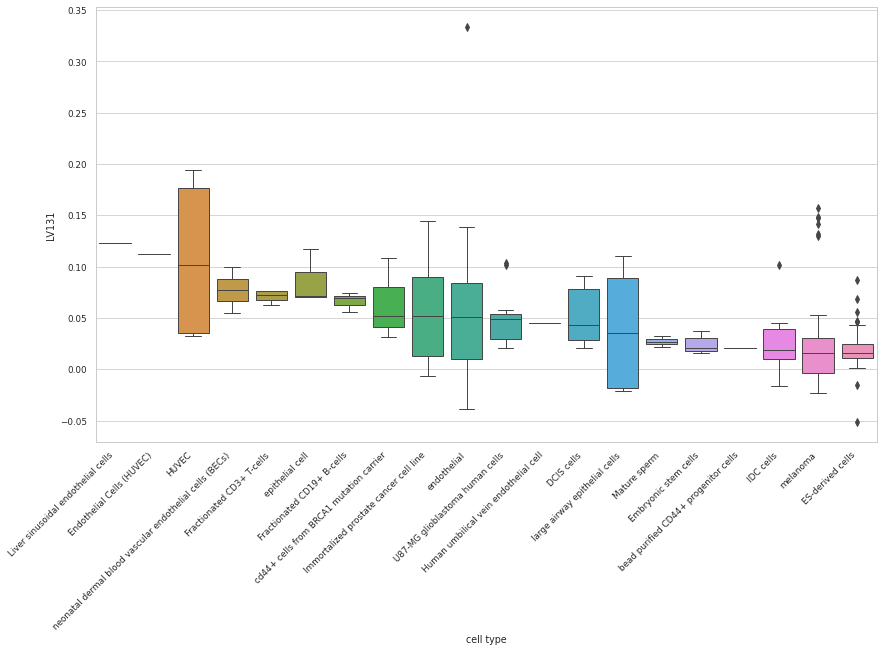

array(['SRP057196', 'SRP019994', 'SRP060355', 'SRP006575', 'SRP066834',
       'SRP012546', 'SRP036821', 'SRP029880', 'SRP042620', 'SRP040442',
       'SRP004837', 'SRP017575', 'SRP015678', 'SRP002628', 'SRP050534',
       'SRP008218', 'SRP017777', 'SRP039591', 'SRP042579', 'SRP058722',
       'SRP039338', 'SRP036053', 'SRP041706', 'SRP041538', 'SRP006769',
       'SRP005279', 'SRP029207', 'SRP014487', 'SRP063838', 'SRP056696',
       'SRP023262'], dtype=object)

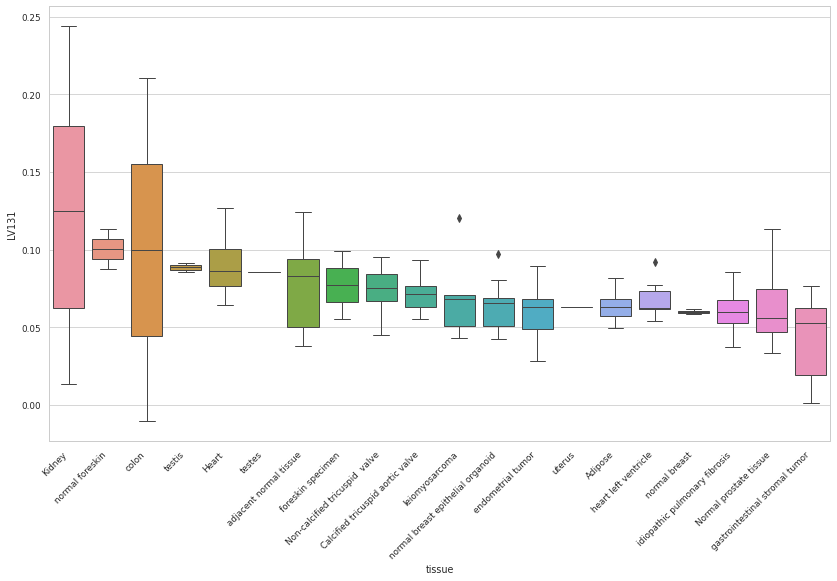

array(['SRP036821'], dtype=object)

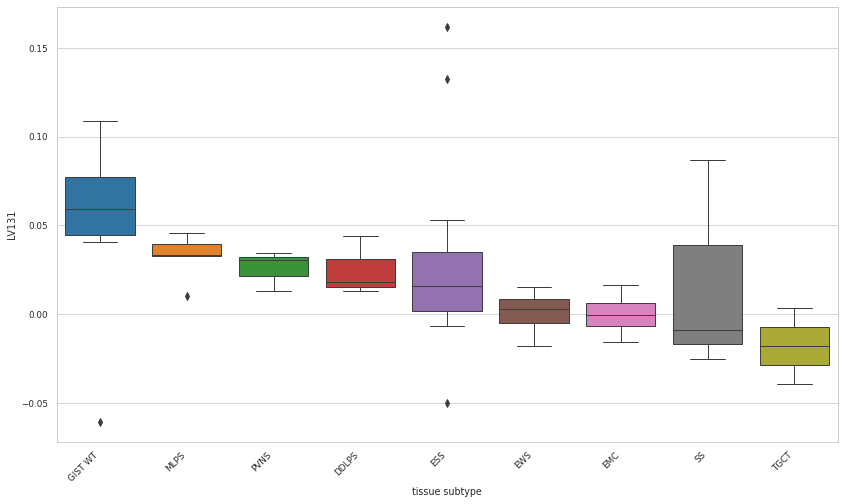

array(['SRP012656'], dtype=object)

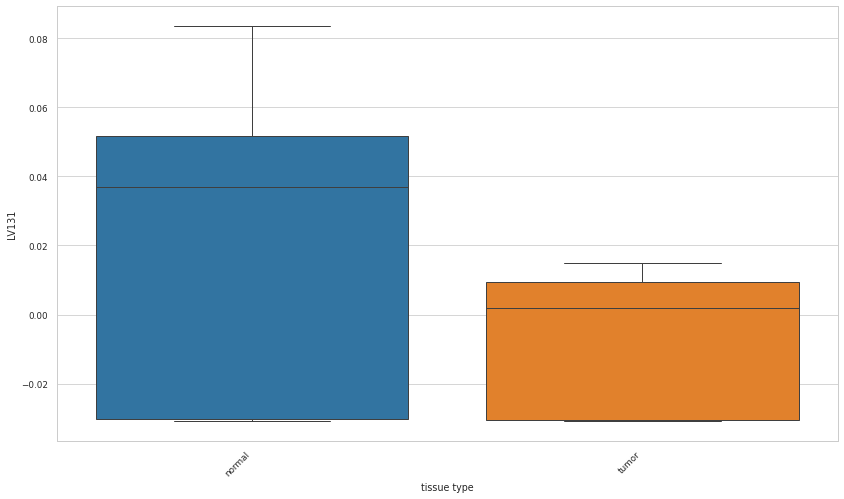

,pathway,LV index,AUC,p-value,FDR


SRP017933, SRP055569, SRP009862, SRP035391, SRP007947, SRP042161, SRP060416, SRP011185, SRP041788, SRP057196, SRP066834, SRP064259, SRP026315, SRP043962, SRP012461, SRP028815, SRP017575, SRP020661, SRP042620, SRP059775, SRP014428, SRP046749, SRP051844, SRP058181, SRP033135, SRP017959, SRP007338, SRP050499, SRP009247, SRP043364, SRP009266, SRP007351, SRP026620, SRP027383, SRP007359, SRP015668, SRP029334, SRP029889, SRP007862, SRP041094, SRP011924, SRP002326, SRP056477, SRP058773, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (41 != 44)
  warnings.warn(


''

3872_raw-Age_of_primiparous_women_at_birth_of_child                                                                                                               3.720529
2634-Duration_of_heavy_DIY                                                                                                                                        3.644054
20003_1141192414-Treatmentmedication_code_crestor_10mg_tablet                                                                                                     3.195468
1835-Mother_still_alive                                                                                                                                           3.176774
22601_12333358-Job_coding_hairdressing_or_beauty_salon_manager_or_proprietorowner                                                                                 3.147439
22601_11623349-Job_coding_storage_manager_stock_control_manager_container_terminal_manager                                                       

''

,gene_name,LV897,gene_band
0,CCR10,5.235448,17q21.2
1,ATP6V1E1,3.245617,22q11.21
2,DYNC1I2,3.054762,2q31.1
3,SYF2,2.716760,1p36.11
4,SNRNP27,2.666987,2p13.3
5,MYL5,2.535663,4p16.3
6,SRP14,2.045264,15q15.1
7,CAB39L,2.014945,13q14.2
8,BHLHE41,2.010032,12p12.1
9,ATP5J,1.905758,21q21.3


tissue       0.042469
cell type    0.005055
dtype: float64

array(['SRP017933', 'SRP057196', 'SRP066834', 'SRP017575', 'SRP020661',
       'SRP042620', 'SRP014428', 'SRP051844', 'SRP058181', 'SRP007359',
       'SRP015668', 'SRP029889', 'SRP007862', 'SRP011924', 'SRP002326',
       'SRP056477'], dtype=object)

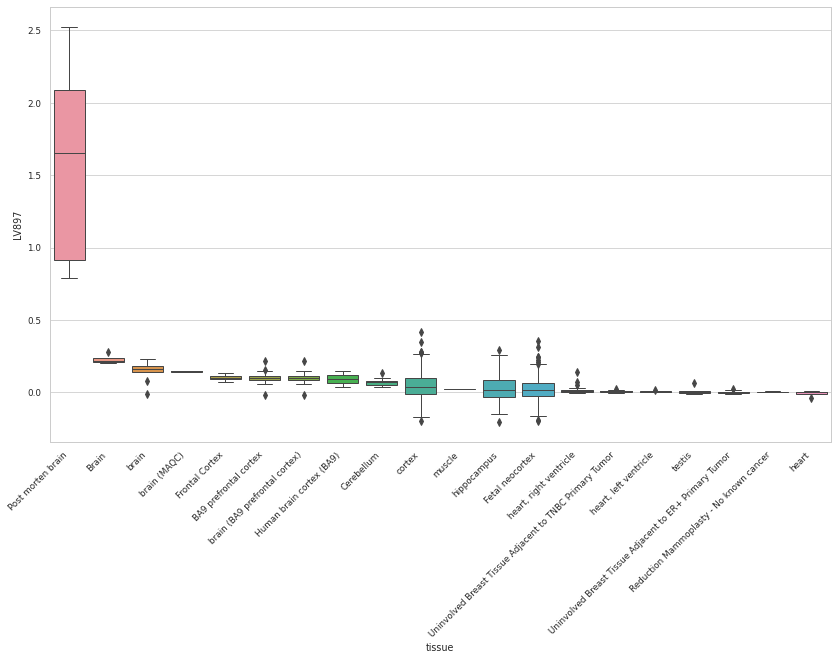

array(['SRP055569', 'SRP007947', 'SRP042161', 'SRP060416', 'SRP057196',
       'SRP064259', 'SRP026315', 'SRP012461', 'SRP014428', 'SRP046749',
       'SRP033135', 'SRP026620', 'SRP041094'], dtype=object)

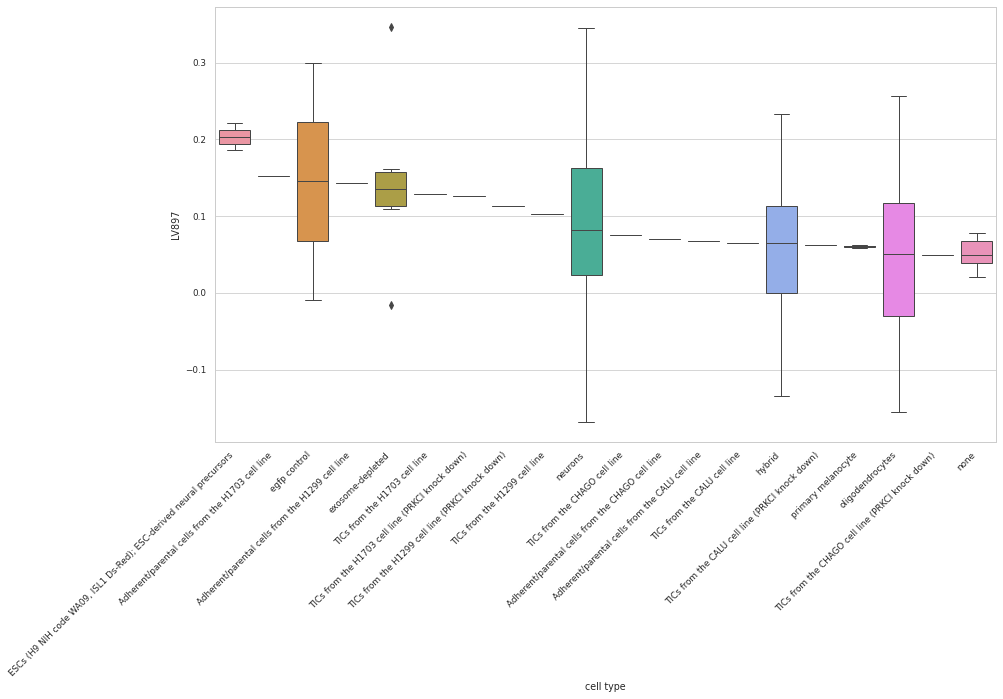

,pathway,LV index,AUC,p-value,FDR


SRP055569, SRP042161, SRP066834, SRP041846, SRP050499, SRP057196, SRP036821, SRP006575, SRP027383, SRP060416, SRP059950, SRP055513, SRP019994, SRP007359, SRP049061, SRP064464, SRP058773, SRP017575, SRP031507, SRP056696, SRP033466, SRP059379, SRP033135, SRP057205, SRP014739, SRP017972, SRP055153, SRP018838, SRP063840, SRP037982, SRP004847, SRP014620, SRP008145, SRP033276, SRP014428, SRP042184, SRP009266, SRP009862, SRP042218, SRP002079, SRP004637, SRP045869, SRP034626, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (41 != 43)
  warnings.warn(


''

1488_raw-Tea_intake                                                                                 5.200678
1498-Coffee_intake                                                                                  4.514611
H8_MYRINGNAS-Other_specifiedunspecified_disorders_of_tympanic_membrane                              4.263221
tympanic membrane disease                                                                           3.900062
6150_100-Vascularheart_problems_diagnosed_by_doctor_None_of_the_above                               3.857912
F05-Diagnoses_main_ICD10_F05_Delirium_not_induced_by_alcohol_and_other_psychoactive_substances      3.695671
4079_raw-Diastolic_blood_pressure_automated_reading                                                 3.510220
100390-Tea_consumed                                                                                 3.460910
20003_1140860696-Treatmentmedication_code_lisinopril                                                3.441639
1508_3-Coffee_type_

''

,gene_name,LV575,gene_band
0,CSK,6.699166,15q24.1
1,DCTN2,4.397277,12q13.3
2,PMP22,4.165462,17p12
3,ATP2C1,3.691221,3q22.1
4,SHISA5,3.330353,3p21.31
5,CMAS,2.813336,12p12.1
6,TMEM176A,2.784225,7q36.1
7,BNIP2,2.705469,15q22.2
8,CDKN1A,2.343843,6p21.2
9,UBE2N,2.282433,12q22


cell type         0.024400
tissue subtype    0.002271
tissue            0.002141
dtype: float64

array(['SRP055569', 'SRP042161', 'SRP041846', 'SRP057196', 'SRP006575',
       'SRP060416', 'SRP049061', 'SRP031507', 'SRP059379', 'SRP033135',
       'SRP055153', 'SRP063840', 'SRP004847', 'SRP014620', 'SRP014428',
       'SRP042218'], dtype=object)

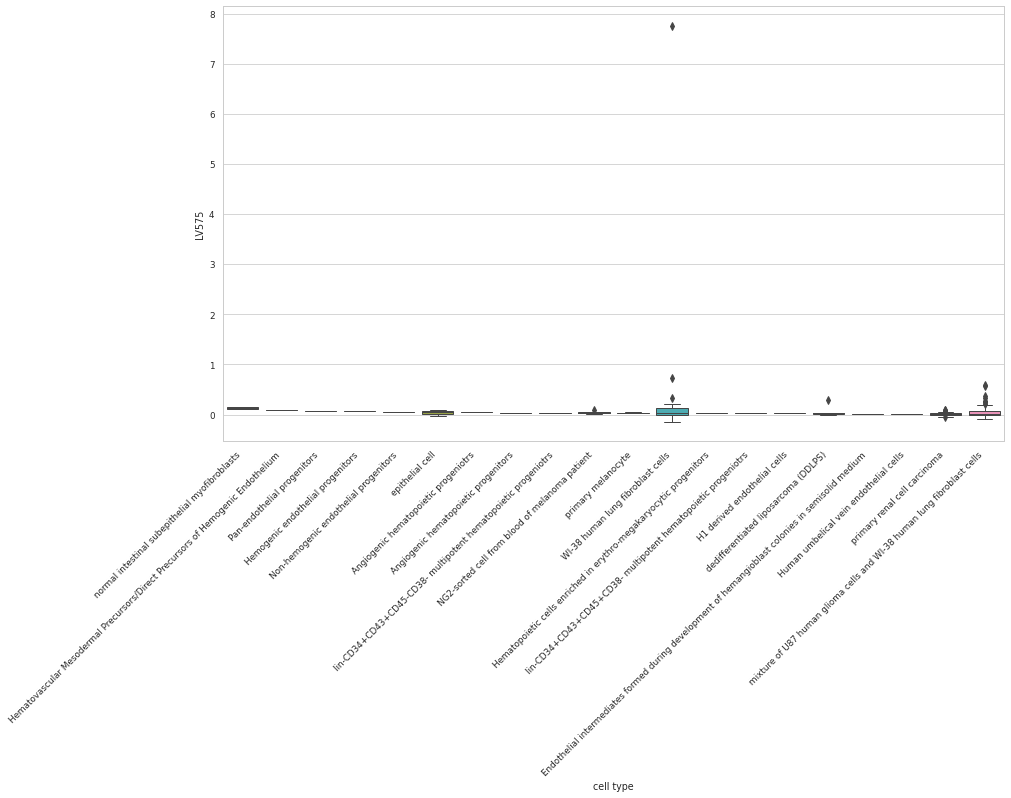

array(['SRP036821'], dtype=object)

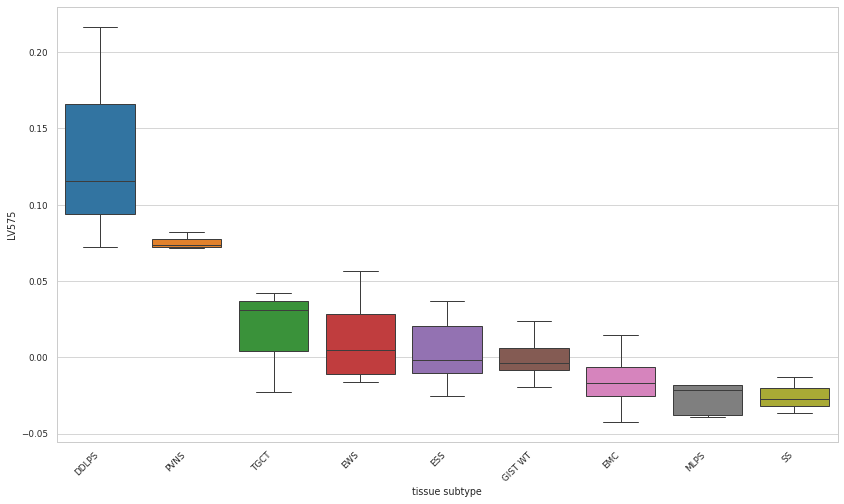

array(['SRP066834', 'SRP057196', 'SRP036821', 'SRP006575', 'SRP055513',
       'SRP019994', 'SRP007359', 'SRP017575', 'SRP056696', 'SRP014739',
       'SRP037982', 'SRP004847', 'SRP033276', 'SRP014428', 'SRP042218',
       'SRP004637', 'SRP045869'], dtype=object)

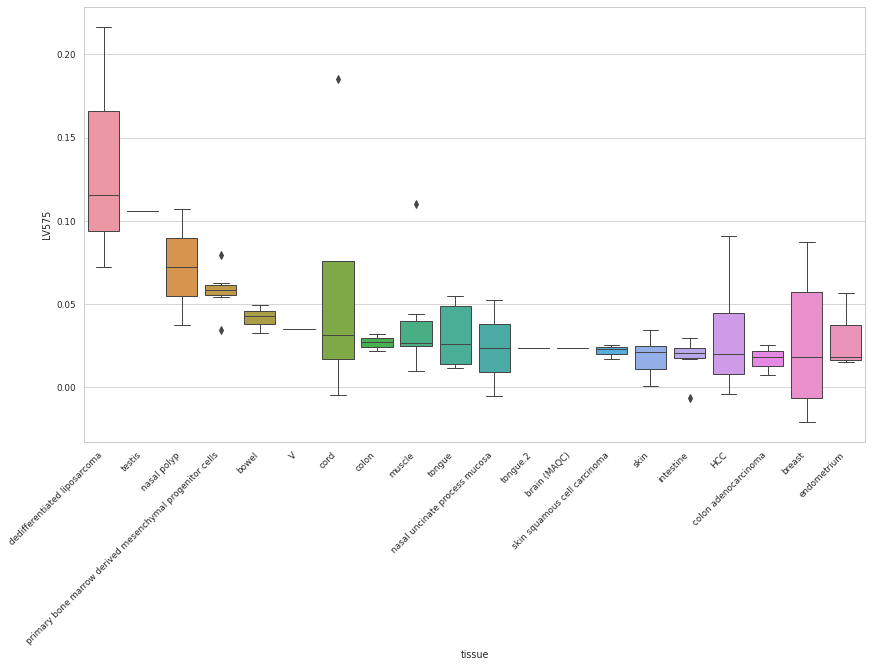

,pathway,LV index,AUC,p-value,FDR
887,REACTOME_TRIGLYCERIDE_BIOSYNTHESIS,246,0.857366,5.437536e-05,6.515981e-04
888,KEGG_PYRUVATE_METABOLISM,246,0.817668,2.905798e-04,2.655850e-03
889,REACTOME_FATTY_ACID_TRIACYLGLYCEROL_AND_KETONE...,246,0.890091,2.762125e-18,3.971936e-16
890,KEGG_PROPANOATE_METABOLISM,246,0.828621,4.947481e-04,4.268686e-03
891,REACTOME_METABOLISM_OF_LIPIDS_AND_LIPOPROTEINS,246,0.671159,3.216205e-10,1.137271e-08


SRP042186, SRP045545, SRP044756, SRP051211, SRP042620, SRP055749, SRP029899, SRP021478, SRP042086, SRP065812, SRP007412, SRP020470, SRP037778, SRP042161, SRP029889, SRP057196, SRP053101, SRP050499, SRP035988, SRP033135, SRP034712, SRP012461, SRP056041, SRP048674, SRP059643, SRP045364, SRP026042, SRP050971, SRP051705, SRP035387, SRP055512, SRP007461, SRP065451, SRP007338, SRP019936, SRP055569, SRP060355, SRP058571, SRP041377, SRP040998, SRP059379, SRP036133, SRP066834, SRP051772, SRP044056, SRP048669, SRP059066, SRP068078, SRP060359, SRP055475, SRP058771, SRP045639, SRP043085, SRP062177, SRP064464, SRP041597, SRP056696, SRP059035, SRP010678, SRP049593, SRP048536, SRP061566, SRP030617, SRP057804, SRP045156, SRP044171, SRP010644, SRP057448, SRP041751, SRP061701, SRP033131, SRP041387, SRP063834, SRP020493, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (72 != 74)
  warnings.warn(


''

30100_raw-Mean_platelet_thrombocyte_volume                                                                              6.632557
MAGNETIC_CH2.DB.ratio                                                                                                   6.584225
1747_2-Hair_colour_natural_before_greying_Red                                                                           6.287111
3143_raw-Ankle_spacing_width                                                                                            5.119107
hypercholesterolemia                                                                                                    4.991051
4119_raw-Ankle_spacing_width_right                                                                                      4.822150
20095_3-Size_of_white_wine_glass_drunk_large_250ml                                                                      4.490390
1727-Ease_of_skin_tanning                                                                        

''

,gene_name,LV246,gene_band
0,SCD,6.672060,10q24.31
1,ACSS2,6.258514,20q11.22
2,GPAM,5.714077,10q25.2
3,DGAT2,4.738347,11q13.5
4,ACLY,3.708678,17q21.2
5,GPD1,3.346001,12q13.12
6,MVD,3.320598,16q24.2
7,FASN,2.915241,17q25.3
8,LPL,2.858278,8p21.3
9,ACSL1,2.682199,4q35.1


cell type      0.028771
tissue         0.013640
tissue type    0.008186
dtype: float64

array(['SRP042186', 'SRP045545', 'SRP044756', 'SRP051211', 'SRP042161',
       'SRP057196', 'SRP033135', 'SRP012461', 'SRP048674', 'SRP045364',
       'SRP035387', 'SRP055512', 'SRP065451', 'SRP055569', 'SRP058571',
       'SRP059379', 'SRP036133', 'SRP051772', 'SRP044056', 'SRP048669',
       'SRP059066', 'SRP045639', 'SRP043085', 'SRP062177', 'SRP059035',
       'SRP010678', 'SRP061566', 'SRP057804', 'SRP010644', 'SRP041751',
       'SRP063834', 'SRP020493'], dtype=object)

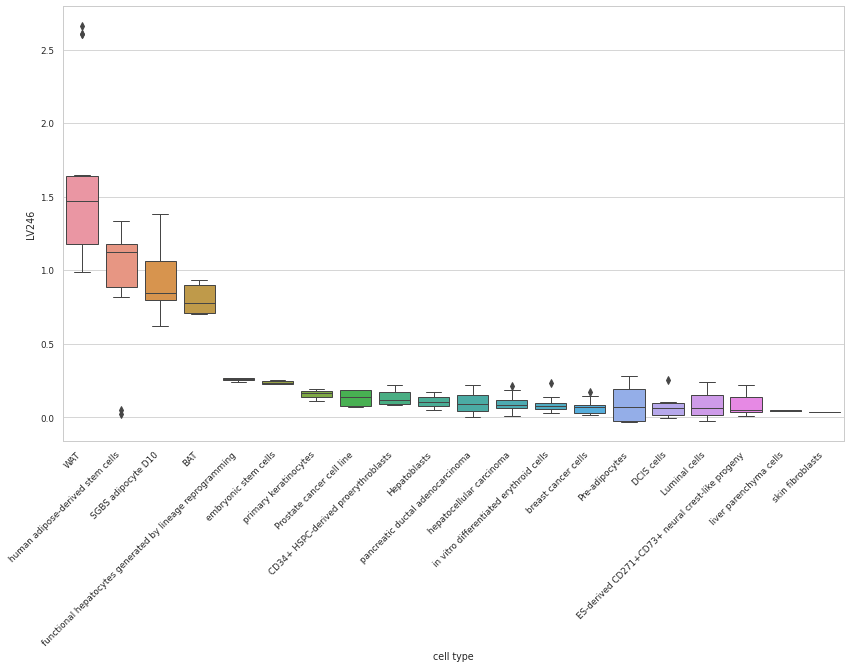

array(['SRP042620', 'SRP055749', 'SRP029899', 'SRP021478', 'SRP042086',
       'SRP029889', 'SRP057196', 'SRP056041', 'SRP026042', 'SRP060355',
       'SRP066834', 'SRP044056', 'SRP043085', 'SRP041597', 'SRP056696',
       'SRP041387'], dtype=object)

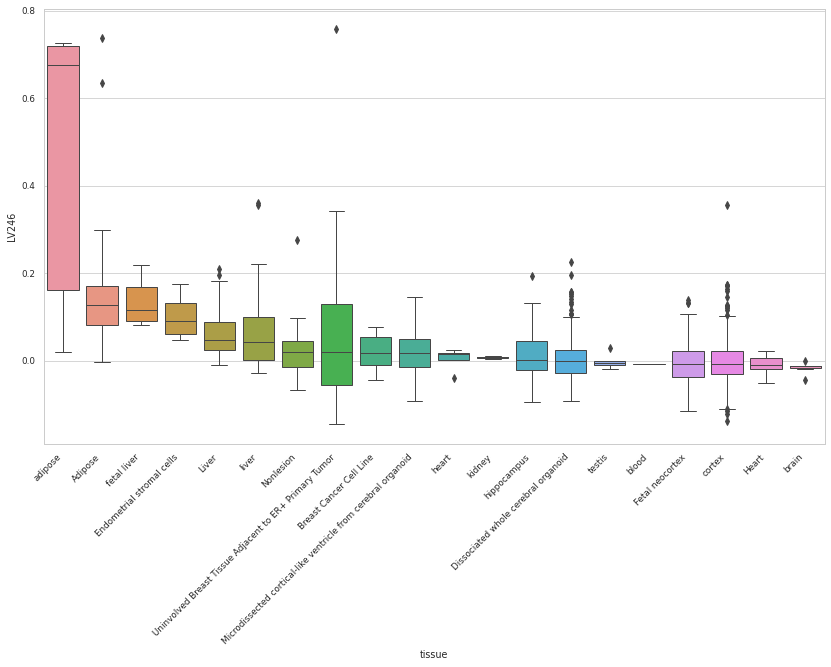

array(['SRP065812', 'SRP035988', 'SRP050971', 'SRP019936'], dtype=object)

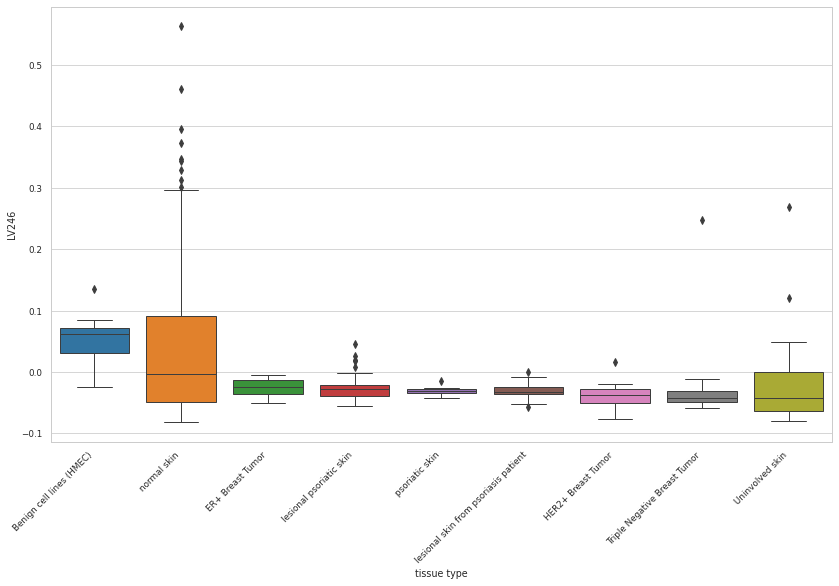

,pathway,LV index,AUC,p-value,FDR
120,KEGG_ECM_RECEPTOR_INTERACTION,22,0.715767,0.000990,0.007656
122,KEGG_PPAR_SIGNALING_PATHWAY,22,0.791673,0.000145,0.001517


SRP042620, SRP053101, SRP055749, SRP042086, SRP060355, SRP037778, SRP029899, SRP021478, SRP007338, SRP055512, SRP042186, SRP045545, SRP044756, SRP051211, SRP036821, SRP006575, SRP008218, SRP019936, SRP057196, SRP025982, SRP058722, SRP023262, SRP041538, SRP050499, SRP015013, SRP021193, SRP055569, SRP018359, SRP012461, SRP004965, SRP017575, SRP056041, SRP049449, 

''

H7_EYEADNEXOTH-Other_specified_and_unspecified_disorders_of_eye_and_adnexa                        3.688139
20003_1140879778-Treatmentmedication_code_doxazosin                                               3.427466
102830-Soft_cheese_intake                                                                         3.393860
40001_C349-Underlying_primary_cause_of_death_ICD10_C349_Bronchus_or_lung_unspecified              3.364810
vestibular disease                                                                                3.316023
H8_VERTIGO-Disorders_of_vestibular_function_Vertigo                                               3.316023
anal fissure                                                                                      3.215231
eating disorder                                                                                   3.207653
22601_32153081-Job_coding_chiropodist_podiatrist                                                  2.958883
L12_PSORI_NAS-Other_and_unspecified_p

''

,gene_name,LV22,gene_band
0,PLIN1,6.626952,15q26.1
1,LEP,6.223140,7q32.1
2,SEMA3G,5.941609,3p21.1
3,LIPE,5.928367,19q13.2
4,BTNL9,5.747405,5q35.3
5,CD36,5.593815,7q21.11
6,GPD1,5.133220,12q13.12
7,LPL,4.301912,8p21.3
8,FZD4,4.265345,11q14.2
9,RBP7,4.005188,1p36.22


tissue            0.117968
tissue subtype    0.008987
cell type         0.007381
tissue type       0.006557
dtype: float64

array(['SRP042620', 'SRP055749', 'SRP042086', 'SRP060355', 'SRP029899',
       'SRP021478', 'SRP036821', 'SRP006575', 'SRP008218', 'SRP057196',
       'SRP058722', 'SRP023262', 'SRP041538', 'SRP021193', 'SRP004965',
       'SRP017575', 'SRP056041'], dtype=object)

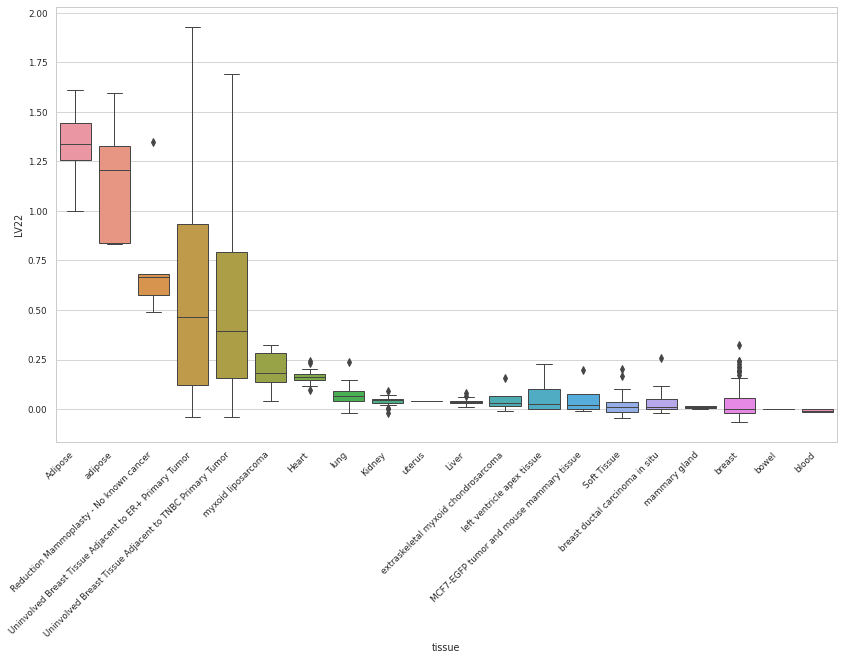

array(['SRP036821'], dtype=object)

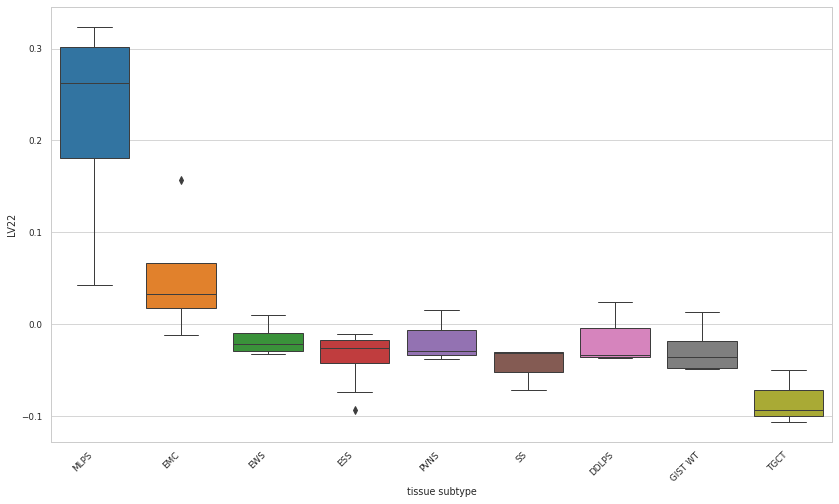

array(['SRP055512', 'SRP042186', 'SRP045545', 'SRP044756', 'SRP051211',
       'SRP006575', 'SRP008218', 'SRP057196', 'SRP055569', 'SRP018359',
       'SRP012461', 'SRP004965', 'SRP049449'], dtype=object)

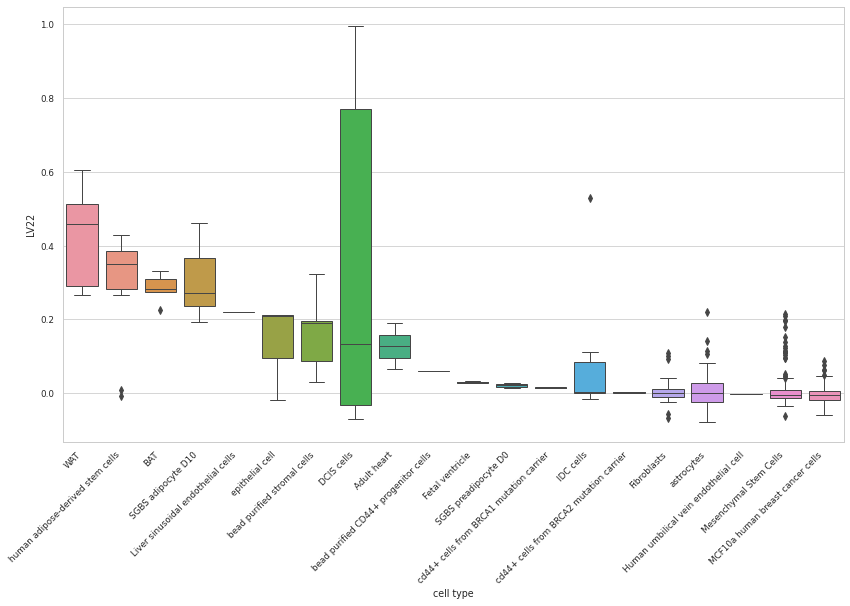

array(['SRP019936'], dtype=object)

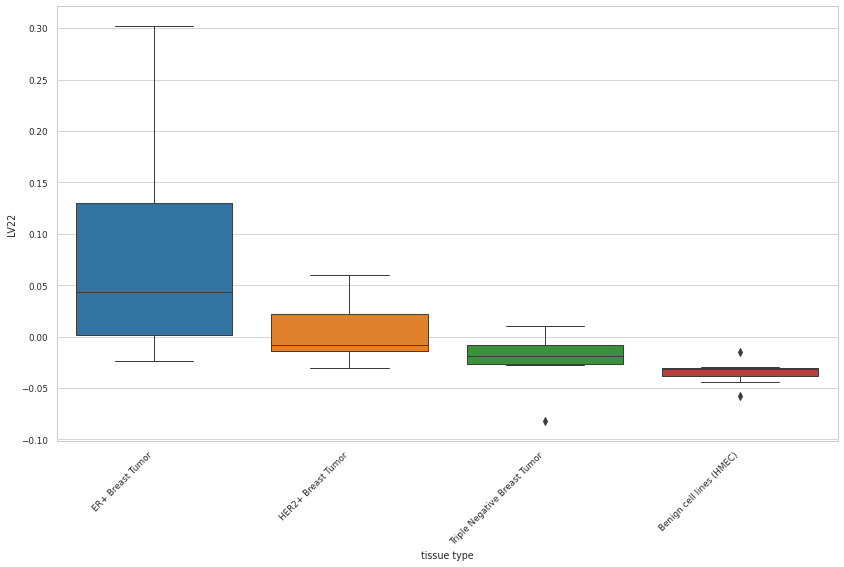

In [27]:
for lv_name in selected_lvs:
    display(HTML(f"<h2>{lv_name}</h2>"))

    #     lv_name = lv_info["name"]
    lv_obj = lv_exp = LVAnalysis(lv_name, data)

    # show lv prior knowledge match (pathways)
    lv_pathways = multiplier_model_summary[
        multiplier_model_summary["LV index"].isin((lv_name[2:],))
        & (
            (multiplier_model_summary["FDR"] < 0.05)
            | (multiplier_model_summary["AUC"] >= 0.75)
        )
    ]
    display(lv_pathways)

    lv_data = lv_obj.get_experiments_data()

    display("")
    display(lv_obj.lv_traits.head(20))
    display("")
    display(lv_obj.lv_genes.head(10))

    lv_attrs = lv_obj.get_attributes_variation_score()
    _tmp = pd.Series(lv_attrs.index)
    lv_attrs = lv_attrs[
        _tmp.str.match(
            "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    for _lva in lv_attrs.index:
        display(HTML(f"<h3>{_lva}</h3>"))
        display(lv_data[_lva].dropna().reset_index()["project"].unique())

        with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
            fig, ax = plt.subplots(figsize=(14, 8))
            ax = lv_obj.plot_attribute(_lva, top_x_values=20)
            if ax is None:
                plt.close(fig)
                continue
            display(fig)
            plt.close(fig)

    LV_OBJS[lv_name] = lv_obj